# Zomato Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
%matplotlib inline

In [2]:
zomato=pd.read_csv('zomato.csv')
zomato.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
zomato.shape

(9551, 21)

In [5]:
#checking for NULL values
zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Cuisines seem to contain some null values. Hence any further analysis involving Cuisines the NaN values have to be considered. 

In [3]:
country_wise=pd.read_excel('Country-Code.xlsx')
country_wise.head(2)

,Country Code,Country
0,1,India
1,14,Australia


Let's merge both datasets to understand the data better countrywise.

In [4]:
df=pd.merge(zomato,country_wise,on='Country Code',how='left')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


# EDA and Visualisation

Before we ask question on the dataset, it would be helpful to understand the resturants geographical spread, understanding the rating, Currency, Online Delivery, City coverage..etc

List of Countries the survey is spread across

In [10]:
for country in pd.unique(country_wise.Country):
    print(country)
print()
print('Total number of Countries in survey ', len(pd.unique(country_wise.Country))) 

India
Australia
Brazil
Canada
Indonesia
New Zealand
Phillipines
Qatar
Singapore
South Africa
Sri Lanka
Turkey
UAE
United Kingdom
United States

Total number of Countries in survey  15


This survey seems to have spread accoss 15 counteries. This shows that Zomata is a multinational company having acitive business in all the counteries listed above.

In [5]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [6]:
labels=list(df.Country.value_counts().index)
values=list(df.Country.value_counts().values)

In [7]:
fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

As Zomato is a startup from India, it makes sense that it has maximum business spread across resturants in India.

In [8]:
df2=df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df2

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


The above information helps us to understand the realation between Aggregate rating, color and text. We conclude the following color assigned to the ratings:

Rating 0 - White - Not rated

Rating 1.8 to 2.4 - Red - Poor

Rating 2.5 to 3.4 - Orange - Average

Rating 3.5 to 3.9 - Yellow - Good

Rating 4.0 to 4.4 - Green - Very Good

Rating 4.5 to 4.9 - Dark Green - Excellent

Let us try to understand the spread of rating across resturants

<AxesSubplot:title={'center':'Spread of Rating'}, xlabel='Rating color', ylabel='Rating Count'>

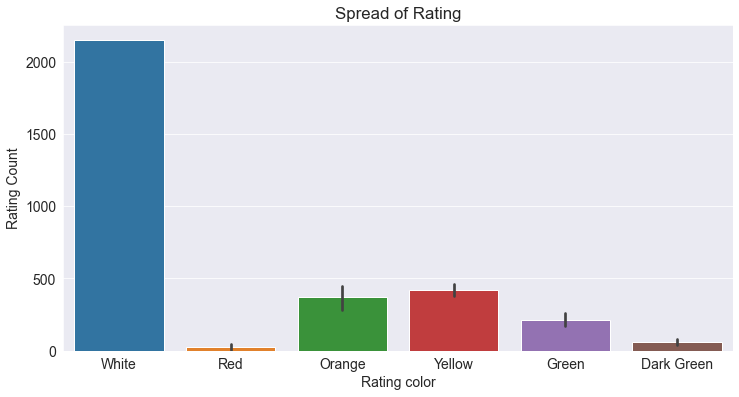

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
plt.rcParams['font.size']=14
plt.title('Spread of Rating')
sns.barplot(x='Rating color',y='Rating Count',data=df2)

Interesting insight, Most of the resturants seem to have got No rating. Let us further check if these resturants belong to some specific country.

In [10]:
no_rating=df[df['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating count'})
no_rating

,Country,Rating count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


India seems to have maximum number of unrated resturants. This could be due the fact that in many parts of India the culture of odering food online is still gaining momentum hence most of the resturants are still unrated on Zomato as majority of the people might gravitate towards actually going to the resturant for their food.

# Country and Currency

In [11]:
country_currency = df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_currency.sort_values('Currency').reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Australia,Dollar($)
3,Canada,Dollar($)
4,Singapore,Dollar($)
5,United States,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


Above table displays Country and the currency they accept. Interstingly four counteries seem to be accepting dollars.

# Online delivery distribution

([<matplotlib.patches.Wedge at 0x124b3e190>,
 [Text(0.7614681082348078, -0.7938301582462733, 'No'),
  Text(-0.7614681825585475, 0.7938300869524804, 'Yes')],
 [Text(0.41534624085534966, -0.43299826813433084, '74.3%'),
  Text(-0.41534628139557134, 0.4329982292468075, '25.7%')])

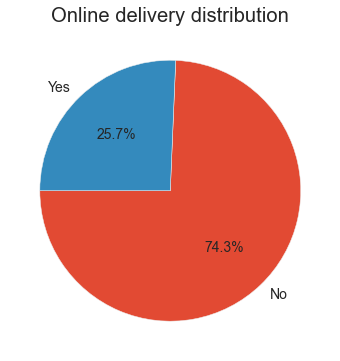

In [22]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
plt.rcParams['font.size']=14
plt.title('Online delivery distribution')
plt.pie(df['Has Online delivery'].value_counts()/9551*100,labels=df['Has Online delivery'].value_counts().index,startangle=180,autopct='%1.1f%%')

Only 25% of restuarants accept online delivery. This data might be biased as maximum resturants listed here are from India. Maybe city wise analysis would be more insightful.

# Let us try to understand the coverage of city

In [32]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

labels=list(df['City'].value_counts().head(20).index)
values=list(df['City'].value_counts().head(20).values)
fig={
    
    'data':[
        
        {
            'type':'pie',
            'hoverinfo':'label+percent',
            'labels':labels,
            'values':values,
            'hole' : 0.6,
            
        }
    ],
    'layout':{
        'title':'City distribution',
        'annotations':[
            {
            'text':'Cities',
            'font': {'size':20},
            'showarrow': True,
            'x':0.2,
            'y':0.9,
            },
        ]
    }
}

iplot(fig)

The data seems to be skewed towards New Delhi, Gurgaon and Noida. I see minimal data for other cities. Hence I would focus my analysis predominantly on New Delhi.

# Asking and Answering Questions

We've already gained several insights about the resturants present in the survey. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

# Q1: From which Locality maximum hotels are listed in Zomata

Text(0.5, 1.0, 'Listing on Zomato')

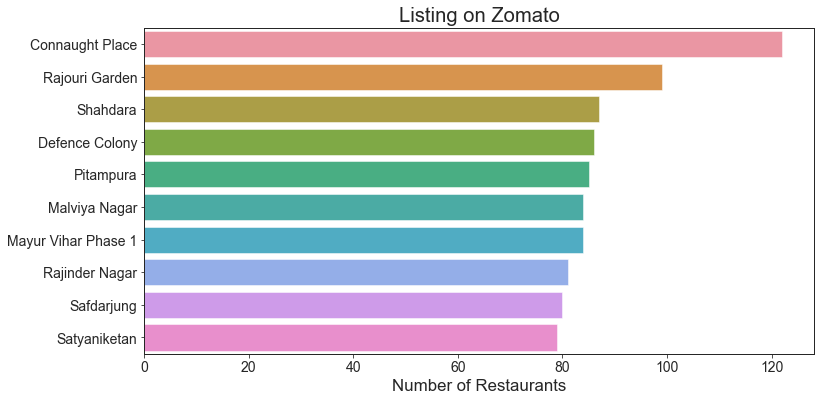

In [41]:
Delhi=df[(df['City']=='New Delhi')]
plt.figure(figsize=(12,6))
sns.set_style('ticks')
sns.barplot(x=Delhi.Locality.value_counts().head(10),y=Delhi.Locality.value_counts().head(10).index)
plt.xlabel('Number of Restaurants')
plt.ylabel(None)
plt.title('Listing on Zomato')

Connaught place seems to have high no of resturatants registered with Zomato, Let us understand the cuisines the top rated resturants offer.

# Q2: What kind of Cusine these highly rates resturants offer

In [52]:
cp=Delhi[(Delhi['Locality'].isin(['Connaught Place'])) & (Delhi['Rating text'].isin(['Excellent','Very Good']))]

<AxesSubplot:xlabel='Cuisines'>

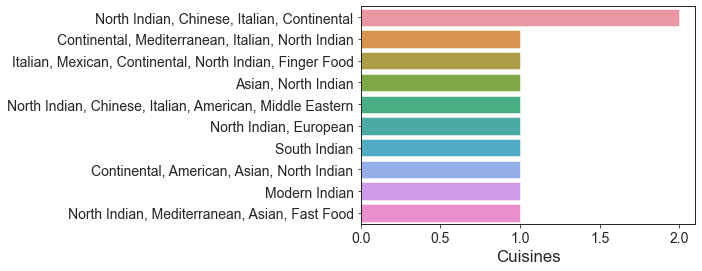

In [53]:
sns.barplot(x=cp.Cuisines.value_counts().head(10),y=cp.Cuisines.value_counts().head(10).index)

Top rated resturants seems to be doing well in the following cuisene

- North Indian
- Chinese
- Italian
- Continental

# Q3: How many of such resturants accept online delivery

Text(0.5, 1.0, 'Resturants Online Delivery')

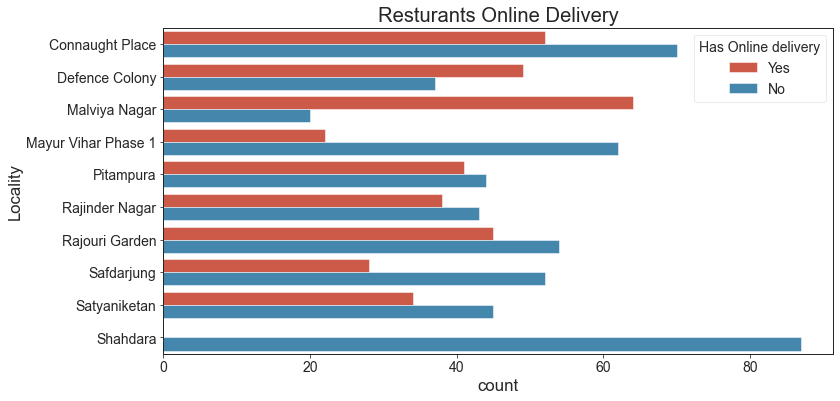

In [59]:
top_locality=Delhi.Locality.value_counts().head(10)
plt.figure(figsize=(12,6))
sns.set_style('ticks')
sns.countplot(y='Locality',hue='Has Online delivery',data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery')

Apart from Shahdara locality, resturants in other locality accepts online delivery.

Online Delivery seems to be on higher side in Defence colony and Malvaiya Nagar.

# Q4: Understanding the Resturants Rating localitywise.

Apart from Maliviya nagar, Defence colony in rest of the locality people seems to prefer visting the resturants rather ordering food online.

I would now like to understand the rating of these resturants that are providing online delivery in Maliviya nagar, Defence colony.

<AxesSubplot:xlabel='Locality', ylabel='count'>

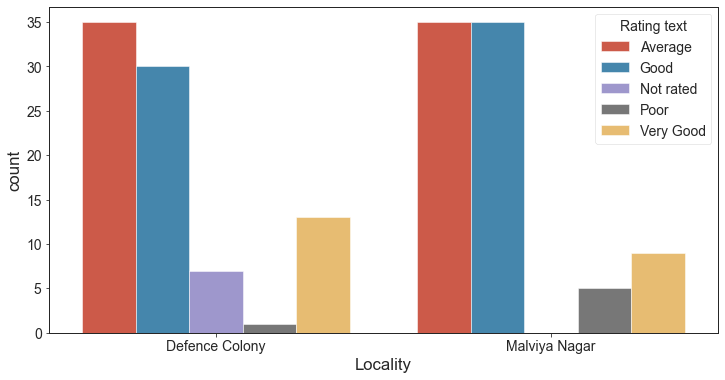

In [62]:
mal_def=Delhi[Delhi.Locality.isin(['Defence Colony','Malviya Nagar'])]
plt.figure(figsize=(12,6))
sns.countplot(x='Locality',data=mal_def,hue='Rating text')

Defence colony seems to have high no of highly rated resturants but Malviya Nagar seems to done better in terms of Good and Average resturants.

As restarants with 'Poor' and 'Not Rated' is far lesser that 'Good', 'Very Good' and 'Excellent' resturants. Hence people in these localities prefer online ordering

# Q5: Rating VS Cost of dinning

Text(0.5, 1.0, 'Rating vs Cost of Two')

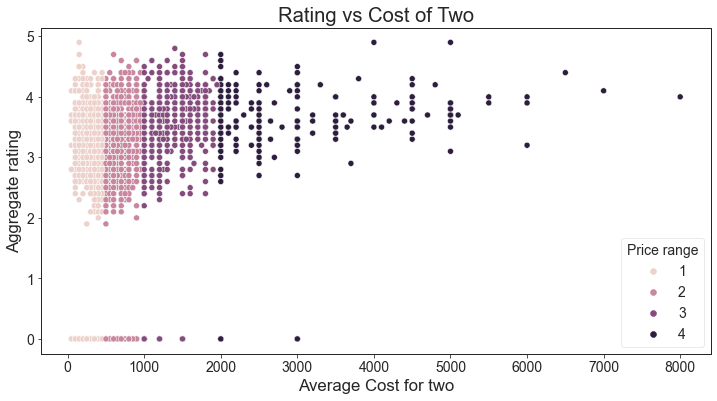

In [66]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Average Cost for two',y='Aggregate rating',hue='Price range',data=Delhi)
plt.title('Rating vs Cost of Two')

I observe there is no linear relation between price and rating. For instance, Resturants with good rating (like 4-5) have resturants with all the price range and spread across the entire X axis

# Q6: Location of Higly rated resturants across New Delhi

In [90]:
import plotly.express as px
Highly_rated = Delhi[Delhi['Rating text'].isin(['Excellent'])]

fig = px.scatter_mapbox(Highly_rated, lat="Latitude", lon="Longitude", hover_name="City", hover_data=["Aggregate rating", "Restaurant Name"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Highly rated Resturants Location',
                  autosize=True,
                  hovermode='closest',
                  showlegend=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()


The aforementioned four cities represent nearly 65% of the total data available in the dataset. Apart from the higly rated local restaurants, it'd be intersting to know where the known-eateries that are commonplace. The verticles across which these can be located are -

- Breakfast
- American Fast Food
- Ice Creams, Shakes & Desserts

# Q7: Common Eateries

1: Breakfast and Coffee locations


In [84]:
types={
    'breakfast':['Cafe Coffee Day','Starbucks','Barista','Costa Coffee','Chaayos',"Dunkin' Donuts"],
    'Fastfood':["McDonald's",'Burger King','Subway',"Domino's Pizza",'Pizza Hut'],
    'IceCream': ['Keventers','Giani','Baskin Robins',"Nirula's Ice Cream","Giani's"]
}

breakfast=Delhi[(Delhi['Restaurant Name'].isin(types['breakfast']))]
fastfood=Delhi[(Delhi['Restaurant Name'].isin(types['Fastfood']))]
icecream=Delhi[(Delhi['Restaurant Name'].isin(types['IceCream']))]

In [77]:
breakfast=breakfast[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)

In [78]:
breakfast

,Restaurant Name,Aggregate rating
2,Chaayos,3.812500
5,Starbucks,3.750000
3,Costa Coffee,3.450000
0,Barista,3.325000
4,Dunkin' Donuts,3.300000
1,Cafe Coffee Day,2.573684


In [80]:
import plotly.express as px
fig=px.bar(breakfast,x='Restaurant Name',y='Aggregate rating',title='Breakfast and Coffee locations')
fig.update_layout(
    autosize=False,
    width=800,
    height=500)
fig.show()

Chaayos outlets are doing very well. Cafe coffe day in contrast seem to fall short in avg rating. They need to step up their game if they want to improve their rating in Delhi.

2: Fastfood locations

In [81]:
fastfood=fastfood[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
fastfood

,Restaurant Name,Aggregate rating
0,Burger King,3.477778
2,McDonald's,3.445455
3,Pizza Hut,3.158333
4,Subway,3.047368
1,Domino's Pizza,2.794545


In [83]:
import plotly.express as px
fig=px.bar(fastfood,x='Restaurant Name',y='Aggregate rating',title='Fastfood locations')
fig.update_layout(
    autosize=False,
    width=800,
    height=500)
fig.show()

Some surprising facts -

-Burger King is rated higher that McDonald's.

-Domino's seems to have got least rating.

-Dunkin's donuts and Subway are rated over Domino's

3: Ice cream and dessert

In [86]:
icecream=icecream[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
icecream

,Restaurant Name,Aggregate rating
1,Giani's,3.011765
2,Keventers,2.983333
0,Giani,2.675000
3,Nirula's Ice Cream,2.400000


In [89]:
import plotly.express as px
fig=px.bar(icecream,x='Restaurant Name',y='Aggregate rating',title='Ice cream locations')
fig.update_layout(
autosize=False,
height=500,
width=800)
fig.show()

Forgin brands seems to be doing better than the local brands

# Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

The dataset is skewed towards India and doesnt represent the complete data of resturants worldwide.

Resturants rating is categorised in six categories

Not Rated

Average

Good

Very Good

Excellent

Connught Palace have maximum resturants listed on Zomato but in terms of online delivery accpetance Defence colony and maliva nagar seems to be doing better.

The top rated resturants seems to be getting better rating on the following cuisine

North Indian

Chinese

Italian

Continental

There is no relation between cost and rating. Some of the best rated resturants are low on cost and vica versa.

On common Eateries, For Breakfast and Coffee location indian resturants seems to be better rated but for Fast food chain and Ice cream parlours american resturants seems to be doing better.

# References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

Zomato Restaurants Data: https://www.kaggle.com/shrutimehta/zomato-restaurants-data

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html